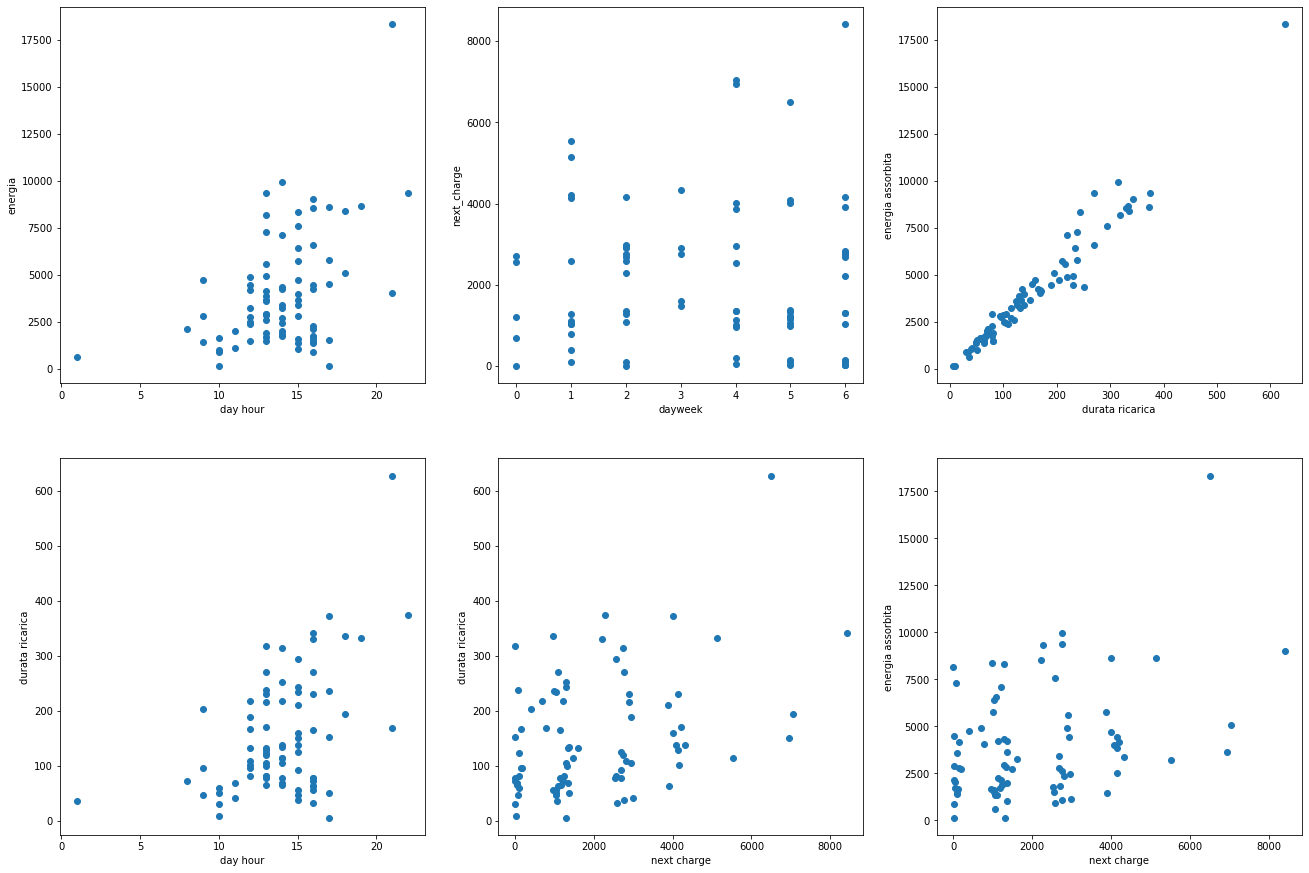

In [238]:
#import time-series from .csv file
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time
import numpy as np
from sklearn.model_selection  import GridSearchCV
from sklearn import preprocessing
df1 = pd.read_csv("/home/just/Scaricati/export.csv" )     #leggo i dati
energia = df1.iloc[:,0]
day_hour = df1.iloc[:,1]
day_week = df1.iloc[:,2]
durata_ricarica = df1.iloc[:,3]
next_charge = df1.iloc[:,4]
weekend  = df1.iloc[:,5]
y = df1[['Durata ricarica (minuti)']]
X = df1[['Energia assorbita (Wh)','Day_hour','Day_week','Next charge (minuti)','Weekend']]
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))    #effettuo lo scaling dei dati
X_scaled = X_std * (1) + 0
plt.subplot(2,3,1)
plt.scatter(x = day_hour , y = energia)
plt.ylabel('energia')
plt.xlabel('day hour')
plt.subplot(2,3,3)
plt.scatter(x= durata_ricarica, y = energia)
plt.xlabel('durata ricarica')
plt.ylabel('energia assorbita')
plt.subplot(2,3,2)
plt.scatter(x=day_week, y = next_charge)
plt.xlabel('dayweek')
plt.ylabel('next_charge')
plt.subplot(2,3,4)
plt.scatter(x=day_hour, y = durata_ricarica)
plt.xlabel('day hour')
plt.ylabel('durata ricarica')
plt.subplot(2,3,5)
plt.scatter(x=next_charge,y=durata_ricarica)
plt.xlabel('next charge')
plt.ylabel('durata ricarica')
plt.subplot(2,3,6)
plt.scatter(x=next_charge,y=energia)
plt.xlabel('next charge')
plt.ylabel('energia assorbita')
plt.subplots_adjust(left=None, bottom=None, right=3, top=3, wspace=None, hspace=None)

In [242]:
#split data into train and set with ratio of 70%/30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3, random_state=0, shuffle = False)

In [243]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
svr_rbf = SVR(kernel='rbf',gamma = 1, C = 1000, epsilon = 1) 
grid_param = [{'C': [10,100,1000,10000, 100000], 'gamma': [0.001, 0.005,0.01,0.1,1], 'kernel': ['rbf'], 'epsilon': [0.1,0.03,0.09,1,0.08] }]
gd_sr = GridSearchCV(estimator=svr_rbf,            #cerco i parametri migliori per l'algoritmo SVR
                     param_grid=grid_param,
                     cv = 3,
                     n_jobs=-1,
                     iid = False)
gd_sr.fit(X_train, y_train.values.ravel())
y_pred = svr_rbf.fit(X_train, y_train.values.ravel()).predict(X_test)     #effettuo la prediione dei risultati
best_parameters = gd_sr.best_params_
print(best_parameters)

{'C': 100000, 'epsilon': 0.03, 'gamma': 0.01, 'kernel': 'rbf'}


Mean Absolute Error: 25.08395374204552
Root Mean Squared Error: 32.90020856861845
R2: 0.8650578853434279


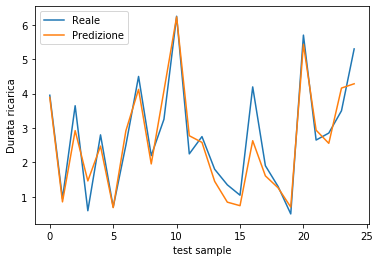

In [246]:
#evaluate results
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2:',r2_score(y_pred,y_test))
ascisse1 = []
ascisse2 = []
ascisse3 = []
for i in (range(0,len(y_test))):
          ascisse1.append(i)
for i in (range(0,len(y_train))):
          ascisse2.append(i)
for i in (range(0,len(y))):
          ascisse3.append(i)
plt.figure(1)
plt.plot(ascisse1,y_test/60,label = 'Reale')
plt.plot(ascisse1,y_pred/60,label = 'Predizione')
plt.xlabel('test sample')
plt.ylabel('Durata ricarica')
plt.legend(loc = 'upper left')
plt.show()